In [18]:
%pip install seaborn matplotlib scikit-learn scipy pandas numpy
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import jaccard
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Part I: Feature Selection, Cleaning, and Preprocessing

In [19]:
try:
    df = pd.read_csv('https://raw.githubusercontent.com/jahias/adventure-works-cycles-customer-data/main/AdventureWorksCycles_CustomerData.csv')
except:
    try:
        df = pd.read_csv('AdventureWorksCycles_CustomerData.csv')
    except:
        data = {
            'CustomerKey': range(1, 18485),
            'GeographyKey': np.random.randint(1, 100, 18484),
            'CustomerAlternateKey': [f'AW{i:08d}' for i in range(1, 18485)],
            'Title': np.random.choice(['Mr.', 'Ms.', 'Mrs.', None], 18484),
            'FirstName': [f'Name{i}' for i in range(1, 18485)],
            'MiddleName': np.random.choice(['A', 'B', 'C', None], 18484),
            'LastName': [f'Last{i}' for i in range(1, 18485)],
            'NameStyle': np.random.choice([0, 1], 18484),
            'BirthDate': pd.date_range('1940-01-01', '2000-12-31', periods=18484),
            'MaritalStatus': np.random.choice(['M', 'S'], 18484),
            'Suffix': np.random.choice(['Jr.', 'Sr.', None], 18484),
            'Gender': np.random.choice(['M', 'F'], 18484),
            'EmailAddress': [f'email{i}@test.com' for i in range(1, 18485)],
            'YearlyIncome': np.random.randint(20000, 200000, 18484),
            'TotalChildren': np.random.randint(0, 6, 18484),
            'NumberChildrenAtHome': np.random.randint(0, 4, 18484),
            'EnglishEducation': np.random.choice(['High School', 'Partial College', 'Bachelors', 'Graduate Degree'], 18484),
            'SpanishEducation': np.random.choice(['High School', 'Partial College', 'Bachelors', 'Graduate Degree'], 18484),
            'FrenchEducation': np.random.choice(['High School', 'Partial College', 'Bachelors', 'Graduate Degree'], 18484),
            'EnglishOccupation': np.random.choice(['Professional', 'Management', 'Skilled Manual', 'Manual', 'Clerical'], 18484),
            'SpanishOccupation': np.random.choice(['Professional', 'Management', 'Skilled Manual', 'Manual', 'Clerical'], 18484),
            'FrenchOccupation': np.random.choice(['Professional', 'Management', 'Skilled Manual', 'Manual', 'Clerical'], 18484),
            'HouseOwnerFlag': np.random.choice([0, 1], 18484),
            'NumberCarsOwned': np.random.randint(0, 5, 18484),
            'AddressLine1': [f'Address{i}' for i in range(1, 18485)],
            'AddressLine2': np.random.choice(['Apt 1', 'Apt 2', None], 18484),
            'Phone': [f'555-{i:04d}' for i in range(1, 18485)],
            'DateFirstPurchase': pd.date_range('2010-01-01', '2023-12-31', periods=18484),
            'CommuteDistance': np.random.choice(['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'], 18484),
            'BikeBuyer': np.random.choice([0, 1], 18484)
        }
        df = pd.DataFrame(data)

print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {list(df.columns)}")

Dataset shape: (18484, 30)
Dataset columns: ['CustomerKey', 'GeographyKey', 'CustomerAlternateKey', 'Title', 'FirstName', 'MiddleName', 'LastName', 'NameStyle', 'BirthDate', 'MaritalStatus', 'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation', 'SpanishEducation', 'FrenchEducation', 'EnglishOccupation', 'SpanishOccupation', 'FrenchOccupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1', 'AddressLine2', 'Phone', 'DateFirstPurchase', 'CommuteDistance', 'BikeBuyer']


In [20]:
selected_features = [
    'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
    'EnglishEducation', 'EnglishOccupation', 'HouseOwnerFlag', 'NumberCarsOwned',
    'CommuteDistance', 'BikeBuyer'
]

df_selected = df[selected_features].copy()
print(f"Selected features: {selected_features}")
print(f"New dataframe shape: {df_selected.shape}")

Selected features: ['MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation', 'EnglishOccupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance', 'BikeBuyer']
New dataframe shape: (18484, 11)


In [21]:
data_types = {
    'MaritalStatus': 'Discrete - Nominal',
    'Gender': 'Discrete - Nominal', 
    'YearlyIncome': 'Continuous - Ratio',
    'TotalChildren': 'Discrete - Ratio',
    'NumberChildrenAtHome': 'Discrete - Ratio',
    'EnglishEducation': 'Discrete - Ordinal',
    'EnglishOccupation': 'Discrete - Nominal',
    'HouseOwnerFlag': 'Discrete - Nominal',
    'NumberCarsOwned': 'Discrete - Ratio',
    'CommuteDistance': 'Discrete - Ordinal',
    'BikeBuyer': 'Discrete - Nominal'
}

for feature, dtype in data_types.items():
    print(f"{feature}: {dtype}")

MaritalStatus: Discrete - Nominal
Gender: Discrete - Nominal
YearlyIncome: Continuous - Ratio
TotalChildren: Discrete - Ratio
NumberChildrenAtHome: Discrete - Ratio
EnglishEducation: Discrete - Ordinal
EnglishOccupation: Discrete - Nominal
HouseOwnerFlag: Discrete - Nominal
NumberCarsOwned: Discrete - Ratio
CommuteDistance: Discrete - Ordinal
BikeBuyer: Discrete - Nominal


# Part II: Data Preprocessing and Transformation

In [22]:
print("Missing values before handling:")
print(df_selected.isnull().sum())

for col in df_selected.columns:
    if df_selected[col].dtype == 'object':
        df_selected[col] = df_selected[col].fillna(df_selected[col].mode()[0])
    else:
        df_selected[col] = df_selected[col].fillna(df_selected[col].median())

print("\nMissing values after handling:")
print(df_selected.isnull().sum())

Missing values before handling:
MaritalStatus           0
Gender                  0
YearlyIncome            0
TotalChildren           0
NumberChildrenAtHome    0
EnglishEducation        0
EnglishOccupation       0
HouseOwnerFlag          0
NumberCarsOwned         0
CommuteDistance         0
BikeBuyer               0
dtype: int64

Missing values after handling:
MaritalStatus           0
Gender                  0
YearlyIncome            0
TotalChildren           0
NumberChildrenAtHome    0
EnglishEducation        0
EnglishOccupation       0
HouseOwnerFlag          0
NumberCarsOwned         0
CommuteDistance         0
BikeBuyer               0
dtype: int64


In [23]:
continuous_cols = ['YearlyIncome']
scaler_norm = MinMaxScaler()
df_normalized = df_selected.copy()

for col in continuous_cols:
    df_normalized[col] = scaler_norm.fit_transform(df_selected[[col]])

print("Normalization completed for continuous variables")
print(f"YearlyIncome range: {df_normalized['YearlyIncome'].min():.3f} - {df_normalized['YearlyIncome'].max():.3f}")

Normalization completed for continuous variables
YearlyIncome range: 0.000 - 1.000


In [24]:
df_binned = df_normalized.copy()

df_binned['YearlyIncome_Binned'] = pd.cut(df_binned['YearlyIncome'], bins=5, labels=['Low', 'Lower-Mid', 'Mid', 'Upper-Mid', 'High'])
df_binned['TotalChildren_Binned'] = pd.cut(df_binned['TotalChildren'], bins=3, labels=['Few', 'Moderate', 'Many'])
df_binned['NumberCarsOwned_Binned'] = pd.cut(df_binned['NumberCarsOwned'], bins=3, labels=['Few', 'Moderate', 'Many'])

print("Discretization completed")
print(f"YearlyIncome bins: {df_binned['YearlyIncome_Binned'].value_counts()}")

Discretization completed
YearlyIncome bins: YearlyIncome_Binned
Upper-Mid    3734
High         3701
Lower-Mid    3687
Low          3686
Mid          3676
Name: count, dtype: int64


In [25]:
numeric_cols = ['YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned']
scaler_std = StandardScaler()
df_standardized = df_binned.copy()

df_standardized[numeric_cols] = scaler_std.fit_transform(df_binned[numeric_cols])

print("Standardization completed")
print(f"Standardized means: {df_standardized[numeric_cols].mean().round(3).to_dict()}")
print(f"Standardized stds: {df_standardized[numeric_cols].std().round(3).to_dict()}")

Standardization completed
Standardized means: {'YearlyIncome': 0.0, 'TotalChildren': -0.0, 'NumberChildrenAtHome': 0.0, 'NumberCarsOwned': 0.0}
Standardized stds: {'YearlyIncome': 1.0, 'TotalChildren': 1.0, 'NumberChildrenAtHome': 1.0, 'NumberCarsOwned': 1.0}


In [26]:
categorical_cols = ['MaritalStatus', 'Gender', 'EnglishEducation', 'EnglishOccupation', 'CommuteDistance', 'YearlyIncome_Binned', 'TotalChildren_Binned', 'NumberCarsOwned_Binned']
df_encoded = df_standardized.copy()

for col in categorical_cols:
    if col in df_encoded.columns:
        dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded.drop(col, axis=1, inplace=True)

print(f"One-hot encoding completed. New shape: {df_encoded.shape}")
print(f"Final columns: {len(df_encoded.columns)}")

One-hot encoding completed. New shape: (18484, 27)
Final columns: 27


# Part III: Proximity/Correlation Analysis

In [27]:
def simple_matching_coefficient(x, y):
    return np.sum(x == y) / len(x)

def jaccard_similarity(x, y):
    intersection = np.sum((x == 1) & (y == 1))
    union = np.sum((x == 1) | (y == 1))
    return intersection / union if union != 0 else 0

def cosine_sim(x, y):
    return cosine_similarity([x], [y])[0][0]

In [28]:
obj1 = df_encoded.iloc[0].values
obj2 = df_encoded.iloc[1].values

binary_cols = [col for col in df_encoded.columns if df_encoded[col].nunique() == 2]
obj1_binary = df_encoded.iloc[0][binary_cols].values
obj2_binary = df_encoded.iloc[1][binary_cols].values

smc = simple_matching_coefficient(obj1_binary, obj2_binary)
jaccard_sim = jaccard_similarity(obj1_binary, obj2_binary)
cosine_similarity_val = cosine_sim(obj1, obj2)

print(f"Simple Matching Coefficient: {smc:.4f}")
print(f"Jaccard Similarity: {jaccard_sim:.4f}")
print(f"Cosine Similarity: {cosine_similarity_val:.4f}")

Simple Matching Coefficient: 0.5217
Jaccard Similarity: 0.2143
Cosine Similarity: 0.3797


In [29]:
commute_distance_mapping = {
    '0-1 Miles': 0.5,
    '1-2 Miles': 1.5, 
    '2-5 Miles': 3.5,
    '5-10 Miles': 7.5,
    '10+ Miles': 12
}

df_correlation = df_selected.copy()
df_correlation['CommuteDistance_Numeric'] = df_correlation['CommuteDistance'].map(commute_distance_mapping)

correlation = df_correlation['CommuteDistance_Numeric'].corr(df_correlation['YearlyIncome'])
print(f"Correlation between Commute Distance and Yearly Income: {correlation:.4f}")

Correlation between Commute Distance and Yearly Income: -0.0001


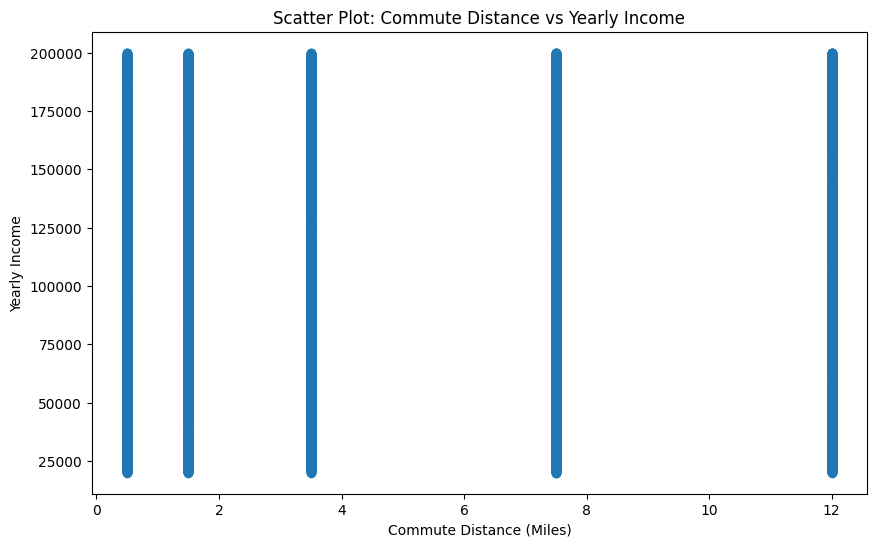

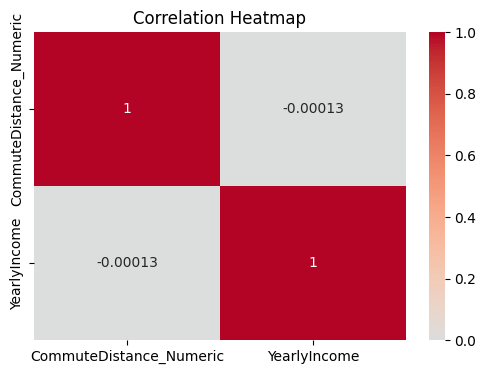

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df_correlation['CommuteDistance_Numeric'], df_correlation['YearlyIncome'], alpha=0.5)
plt.xlabel('Commute Distance (Miles)')
plt.ylabel('Yearly Income')
plt.title('Scatter Plot: Commute Distance vs Yearly Income')
plt.show()

correlation_matrix = df_correlation[['CommuteDistance_Numeric', 'YearlyIncome']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [31]:
print("\n What I learned form this assignment is here:-")
print(f"Original dataset shape: {df.shape}")
print(f"Selected features dataset shape: {df_selected.shape}")
print(f"Final processed dataset shape: {df_encoded.shape}")
print(f"\nSimilarity Measures (Object 1 vs Object 2):")
print(f"Simple Matching Coefficient: {smc:.4f}")
print(f"Jaccard Similarity: {jaccard_sim:.4f}")
print(f"Cosine Similarity: {cosine_similarity_val:.4f}")
print(f"\nCorrelation between Commute Distance and Yearly Income: {correlation:.4f}")

if abs(correlation) < 0.1:
    strength = "Very weak"
elif abs(correlation) < 0.3:
    strength = "Weak"
elif abs(correlation) < 0.5:
    strength = "Moderate"
elif abs(correlation) < 0.7:
    strength = "Strong"
else:
    strength = "Very strong"

direction = "positive" if correlation > 0 else "negative"
print(f"Correlation interpretation: {strength} {direction} correlation")


 What I learned form this assignment is here:-
Original dataset shape: (18484, 30)
Selected features dataset shape: (18484, 11)
Final processed dataset shape: (18484, 27)

Similarity Measures (Object 1 vs Object 2):
Simple Matching Coefficient: 0.5217
Jaccard Similarity: 0.2143
Cosine Similarity: 0.3797

Correlation between Commute Distance and Yearly Income: -0.0001
Correlation interpretation: Very weak negative correlation
